## Function and Tangent Residual Diagnostics

This notebook investigates the accuracy of **adaptive polynomial fitting** vs. **finite difference stencils** for numerical derivative estimation. We visualize the behavior of each method by comparing how well their computed tangents match the target function in a neighborhood around a chosen point.

---

### Plot Overview

The plot has up to **four vertically stacked panels**, depending on the `show_ratio_panel` setting:

1. **Function with Tangents**
   Shows the true function and its tangent lines estimated by:
   - Adaptive polynomial fit (solid line)
   - Finite difference method (dotted line)

2. **Residuals**
   Displays the raw difference:
   $f(x) - T(x)$
   where $ T(x) $ is the tangent approximation.
   This diagnoses where and how the tangent diverges from the function.

3. **Fractional Residuals**
   Normalized error:
   $\frac{f(x) - T(x)}{f(x)}$
   Highlights relative error across the domain, especially where $f(x)$ is small.

4. **Residual Ratio (optional)**
   If `show_ratio_panel=True`, the plot includes a fourth panel:
   $\frac{\text{adaptive}}{\text{finite}} - 1$
   - Values near zero indicate similar performance
   - Negative values show better performance by the **adaptive method**

---

### Takeaways

- This diagnostic view allows you to **visually evaluate the quality** of numerical derivative approximations.
- Differences between the tangent lines and residuals highlight where each method performs better or worse.
- **Adaptive methods** typically incur more computational cost but offer **superior local accuracy**, especially in noisy or nonlinear regions.
- You can reuse this framework to analyze **higher-order derivatives** or more complex functions.


In [2]:
from derivkit.plotutils import plot_kit as pk
from derivkit.plotutils.plot_style import apply_plot_style

from functions_dict import test_functions_residuals as test_functions

# Apply consistent style
apply_plot_style()

## Selecting a Test Function

The available test functions are stored in a list of dictionaries called `test_functions`, where each entry contains keys like `"name"`, `"func"`, and `"label"`.

To explore what's available, you can display all function names and labels like this:


In [6]:
# Uncomment the following lines to see available functions
#for f in test_functions:
#    print(f"Name: {f['name']}, Label: {f['label']}")


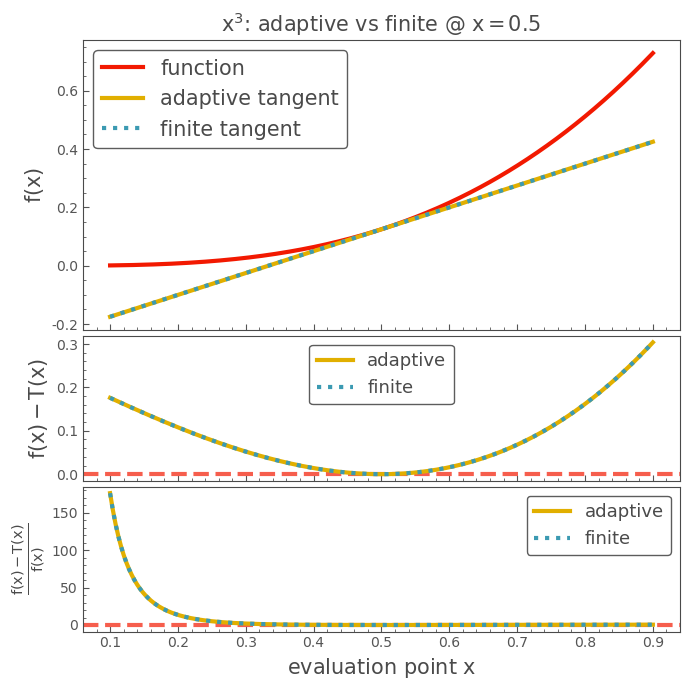

In [3]:
# Choose function by index or name
selected = next(f for f in test_functions if f["name"] == "x_cubed")
x0 = 0.5

# Call the plotting function
pk.plot_function_with_residuals(
    selected["func"],
    x0=x0,
    order=1,
    dx=0.4,
    title=fr"{selected['label']}: adaptive vs finite @ $x = {x0}$",
    show_ratio_panel=False,
    function_name=test_functions[0]["name"],
)
